# Trabalho Word cloud - 2º Bimestre

**Integrantes**: 

- Lucas Faria (00019790)
- Wesley Bernardes (00020321)

Nuvem de palavras utilizando um conjunto de dados com 50.000 avaliações de filmes do IMDB, categorizadas como positivas ou negativas.

**1º Instalar as bibliotecas**

In [ ]:
!pip install pandas nltk wordcloud matplotlib

**2º Importar as bibliotecas**

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**3º Baixar os recursos do NLTK**

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**4º Carregar o conjunto de dados do IMDB Reviews**

In [6]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
dataset_path = 'aclImdb_v1.tar.gz'

**5º Baixar e extraie o dataset**

In [7]:
!wget $url -O $dataset_path
!tar -xzf $dataset_path

--2024-06-10 17:01:16--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  20.7MB/s    in 4.6s    

2024-06-10 17:01:21 (17.5 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



**6º Criar função para carregar as avaliações em um dt**

In [8]:
def load_imdb_reviews(path):
    import os
    import pandas as pd

    data = {'review': [], 'sentiment': []}

    for sentiment in ['pos', 'neg']:
        dir_path = os.path.join(path, 'train', sentiment)
        
        for filename in os.listdir(dir_path):
            if filename.endswith('.txt'):
                with open(os.path.join(dir_path, filename), 'r', encoding='utf-8') as f:
                    data['review'].append(f.read())
                    data['sentiment'].append(sentiment)

    return pd.DataFrame(data)

**7º Carregar as avaliações**

In [9]:
df = load_imdb_reviews('aclImdb')

**8º Visualizar as primeiras linhas do dt**

In [10]:
df.head()

,review,sentiment
0,John (Ben Chaplin) is a lonely bank clerk who ...,pos
1,A hilarious Neil Simon comedy that evokes laug...,pos
2,"Often laugh out loud, sometimes sad story of 2...",pos
3,Who made this film? I love this film? Somebody...,pos
4,This flick is sterling example of the state of...,pos


**9º Fazer a Tokenização dos textos**

In [11]:
df['tokens'] = df['review'].apply(word_tokenize)

**10º Remover as stop words**

In [12]:
stop_words = set(stopwords.words('english'))

df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words and token.isalpha()])

**11º Contar a frequência dos tokes restantes**

In [13]:
all_tokens = [token for tokens in df['filtered_tokens'] for token in tokens]

freq_dist = nltk.FreqDist(all_tokens)

**12º Criar a nuvem de palavras com as palavras mais frequentes**

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

**13º Exibir a nuvem**

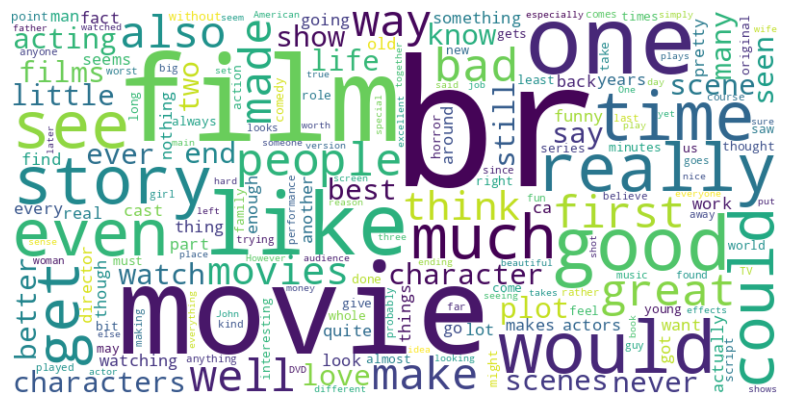

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()